In [38]:
import pandas as pd
import numpy as np


In [39]:
def precission(y_hat, y_true):
    tp = np.sum(y_true[y_hat == 1])
    tot_p = np.sum(y_hat)
    
    return tp / tot_p

def recall(y_hat, y_true):
    tp = np.sum(y_true[y_hat == 1])
    fn = np.sum(y_true[y_hat==0])
    
    return tp / (tp + fn)

In [40]:
ds = pd.read_csv('./radar_points.txt')
ds.seq = ds.seq.astype(int)
ds.object_label = ds.object_label.astype(int)
ds.head()

,id,stamp,seq,x,y,z,probability,relative_radial_velocity,relative_lateral_velocity,cross_section,distance_rms,angle_rms,radial_velocity_rms,is_cylindrical,absolute_radial_velocity,belongs_to_object,object_label
0,0,1.523894e+09,52,476.396881,559.627075,0.3,0.999,0.000000,0.0,-9.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
1,1,1.523894e+09,52,479.438354,566.931030,0.3,0.250,1.100242,0.0,-3.5,0.0,0.0,0.0,0.0,1.100242,0.0,0
2,2,1.523894e+09,52,480.062286,566.430298,0.3,0.750,1.488896,0.0,-12.5,0.0,0.0,0.0,0.0,1.488896,0.0,0
3,3,1.523894e+09,52,480.721039,568.209595,0.3,0.250,0.677458,0.0,-5.5,0.0,0.0,0.0,0.0,0.677458,0.0,0
4,4,1.523894e+09,52,481.002228,568.240417,0.3,0.750,0.225063,0.0,-9.5,0.0,0.0,0.0,0.0,0.225063,0.0,0


## Что тут есть?

cross_section - можно думать, что это логарифм площади
relative_lateral_velocity - скорость относительно радара, радиальная ее часть
absolute_radial_velocity - скорость относительно мира

belongs_to_object - попала ли точка по нашему мненияю на машину

### Эвристика №1

![](./img/credo.jpg)

Машины большие и едут быстро

In [41]:
y_hat = np.zeros(len(ds.values))
#dummy_mask = TODO
dummy_mask = ds.absolute_radial_velocity > 2
y_hat[dummy_mask] = 1
print 'precission', precission(y_hat, ds.belongs_to_object.values)
print 'recall', recall(y_hat, ds.belongs_to_object.values)

precission 0.3082339135536867
recall 0.11514575874917805


### Эвристика №2

Машины отражают по несколько точек

In [46]:
dummy_cars = ds[dummy_mask][['x', 'y']].values

from sklearn.neighbors import NearestNeighbors

#TODO
index = NearestNeighbors()
index.fit(dummy_cars)
d, _ = index.kneighbors(ds[['x', 'y']], n_neighbors=2)

y_hat = np.zeros(len(ds.values))

y_hat[(d < 2.0)[:, 0]] = 1.0

print 'precission', precission(y_hat, ds.belongs_to_object.values)
print 'recall', recall(y_hat, ds.belongs_to_object.values)

precission 0.1570003605335897
recall 0.9544823555198363


In [47]:
import matplotlib.pyplot as plt
from IPython import display
import time

KeyboardInterrupt: 

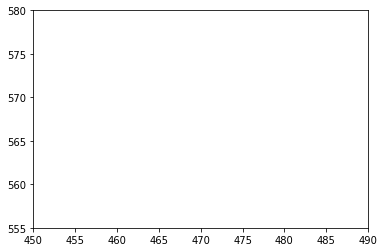

In [48]:
ax = plt.gca()
for seq in sorted(ds.seq.unique()):
    ax.clear()
    scene = ds[ds.seq == seq]
    plt.scatter(scene.x, scene.y, s=5, c=scene.relative_radial_velocity)
    ax.set_xlim((450,490))
    ax.set_ylim((555,580))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.01)